In [1]:
import numpy as np
from scipy import stats

np.random.seed(110) # for reproducible random results

# set parameters
red_mean = 3
red_std = 0.8

blue_mean = 7
blue_std = 2

# draw 20 samples from normal distributions with red/blue parameters
red = np.random.normal(red_mean, red_std, size=20)
blue = np.random.normal(blue_mean, blue_std, size=20)

both_colours = np.sort(np.concatenate((red, blue))) # for later use...

In [4]:
print(np.mean(red))
print(np.std(red))
print(np.mean(blue))
print(np.std(blue))

2.8132116984626867
0.8001119672360739
6.972553898467638
2.0388437926931493


In [5]:
# estimates for the mean
red_mean_guess = 1.1
blue_mean_guess = 9

# estimates for the standard deviation
red_std_guess = 2
blue_std_guess = 1.7

In [7]:
likelihood_of_red = stats.norm(red_mean_guess, red_std_guess).pdf(both_colours)
likelihood_of_blue = stats.norm(blue_mean_guess, blue_std_guess).pdf(both_colours)

In [8]:
likelihood_total = likelihood_of_red + likelihood_of_blue

red_weight = likelihood_of_red / likelihood_total
blue_weight = likelihood_of_blue / likelihood_total

In [9]:
def estimate_mean(data, weight):
    return np.sum(data * weight) / np.sum(weight)

def estimate_std(data, weight, mean):
    variance = np.sum(weight * (data - mean)**2) / np.sum(weight)
    return np.sqrt(variance)

# new estimates for standard deviation
blue_std_guess = estimate_std(both_colours, blue_weight, blue_mean_guess)
red_std_guess = estimate_std(both_colours, red_weight, red_mean_guess)

# new estimates for mean
red_mean_guess = estimate_mean(both_colours, red_weight)
blue_mean_guess = estimate_mean(both_colours, blue_weight)

In [ ]:
https://pythonmachinelearning.pro/clustering-with-gaussian-mixture-models/


This code simply creates a grid of all X and Y coordinates between -1 and 6 (for both) and evaluates our GMM.

[[1.60629419 1.3470999 ]
 [3.0363831  3.09828041]]


[[[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]

 [[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]]


/opt/ds/lib/python3.4/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/opt/ds/lib/python3.4/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


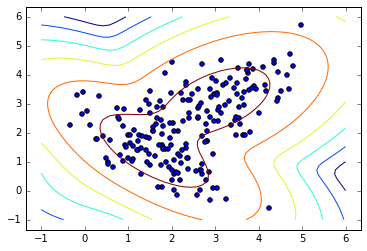

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.mixture import GaussianMixture

X_train = np.load('data//clustering//data.npy')

"""
plt.plot(X[:,0], X[:,1], 'bx')
plt.axis('equal')
plt.show()
"""

gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

print(gmm.means_)
print('\n')
print(gmm.covariances_)

X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))

plt.contour(X, Y, Z)
plt.scatter(X_train[:, 0], X_train[:, 1])

plt.show()
